In [21]:
import sys
import tensorflow.keras
import tensorflow as tf

print(f"tensorflow version : {tf.__version__}")
# print(f"keras version : {tensorflow.keras.__version__}")

gpu = len(tf.config.list_physical_devices('GPU'))>0
print("GPU is " , "Available" if gpu else "NOT available")

tensorflow version : 2.13.0
GPU is  Available


In [22]:
import numpy as np
import matplotlib.pyplot as plt
import os
import math
from sklearn.metrics import precision_score
from tensorflow.keras import regularizers
import shutil
import glob
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Concatenate, AveragePooling2D, Flatten, Dense
from keras.layers import Conv2D , GlobalAveragePooling2D , MaxPooling2D,Dropout , Flatten , Dense, BatchNormalization, GlobalAvgPool2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import keras
import tensorflow as tf
from tensorflow.keras.layers import GaussianNoise
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.python.framework.func_graph import flatten
from keras.callbacks import ModelCheckpoint , EarlyStopping , ReduceLROnPlateau
from tensorflow.keras.models import Model , load_model
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications import  InceptionV3
from tensorflow.keras.applications.inception_v3 import  preprocess_input
from sklearn.model_selection import KFold
from keras.callbacks import Callback

In [23]:
import os

root_dir = "data"
number_of_images = {}

for dir in os.listdir(root_dir):
    # Ignore .DS_Store files
    if dir == '.DS_Store':
        continue

    # Check if the item is a directory before listing its contents
    if os.path.isdir(os.path.join(root_dir, dir)):
        number_of_images[dir] = len(os.listdir(os.path.join(root_dir, dir)))

print(number_of_images.items())


dict_items([('Dress', 6000), ('Sneaker', 6000), ('Coat', 6000), ('Sandal', 6000), ('Angle boot', 6000), ('T-shirt', 6000), ('Bag', 6000), ('Shirt', 6000), ('Pullover', 6000), ('Trouser', 6000)])


In [24]:
def foldercreation (path , split) :
    if not os.path.exists('./'+path):
      os.mkdir('./'+path)

      for dir in os.listdir(root_dir):
        if dir == '.DS_Store':
           continue
            
        os.makedirs('./'+path+"/"+dir)

        for img in np.random.choice(a=os.listdir(os.path.join(root_dir,dir)) , size = (math.floor(split * number_of_images[dir])-5) , replace=False):
          Original = os.path.join(root_dir,dir,img)
          Destination =os.path.join('./'+path , dir)
          shutil.copy(Original,Destination)
          # os.remove(Original)

    else:
      print("The folder exsist")

In [25]:
foldercreation("train_data",0.7)
foldercreation("validation_data",0.15)
foldercreation("test_data",0.15)

The folder exsist
The folder exsist
The folder exsist


In [26]:
image_data = ImageDataGenerator (
                                     
                                      shear_range=0.2,
                                      zoom_range=0.2,
                                      horizontal_flip=True,
                                      preprocessing_function= preprocess_input,
                                )

image=image_data.flow_from_directory(directory="train_data" ,
                                       target_size=(28,28),
                                       batch_size=32,
                                       shuffle=True,
                                       class_mode="categorical")

Found 41950 images belonging to 10 classes.


In [27]:
def preprocessing2 (path):
  image_data = ImageDataGenerator(preprocessing_function= preprocess_input)
  image = image_data.flow_from_directory(directory = path,
                                         target_size=(28,28),
                                         batch_size = 32,
                                         shuffle=True,
                                         class_mode = "categorical")
  return image

In [28]:
path_test ="test_data"
test_data = preprocessing2(path_test)
X_test , Y_test = test_data.next()

Found 8950 images belonging to 10 classes.


In [29]:
path_validate="validation_data"
validate_data = preprocessing2(path_validate)
validate_data_1 , validate_labels = validate_data.next()

Found 8950 images belonging to 10 classes.


In [30]:
elu = tf.nn.elu
def model_layer_1 (inputs,filters):


  convo_2x2 = Conv2D(filters=filters[0], kernel_size=(2,2), padding='same', activation='elu')(inputs)
  convo_3x3 = Conv2D(filters=filters[1], kernel_size=(3,3), padding='same', activation='elu')(inputs)
  pool_conv = Conv2D(filters=filters[2], kernel_size=(3,3), padding='same', activation='elu')(inputs)


  outputs = Concatenate(axis=-1)([convo_2x2, convo_3x3, pool_conv])

  return outputs


def model_layer_2 (inputs,filters):



  convo_3x3 = Conv2D(filters=filters[0], kernel_size=(2,2), padding='same', activation='elu')(inputs)
  pool_3x3 =MaxPooling2D(pool_size=(2,2), strides=(1,1), padding='same')(convo_3x3)

  convo_5x5 = Conv2D(filters=filters[1], kernel_size=(3,3), padding='same', activation='elu')(inputs)
  pool_5x5 = MaxPooling2D(pool_size=(3,3), strides=(1,1), padding='same')(convo_5x5)

  outputs = Concatenate(axis=-1)([pool_3x3, pool_5x5])

  return outputs


def model_layer_3 (inputs,filters):
    
  convo_1x1 = Conv2D(filters=filters[0], kernel_size=(3,3), padding='same', activation='elu')(inputs)
  pool_1x1 = MaxPooling2D(pool_size=(3,3), strides=(1,1), padding='same')(inputs)
  outputs = Concatenate(axis=-1)([pool_1x1, convo_1x1])

  return outputs


# def model_layer_5 (inputs,filters):
    
#   convo_1x1 = Conv2D(filters=filters[0], kernel_size=(5,5), padding='same', activation='relu')(inputs)
#   pool_1x1 = MaxPooling2D(pool_size=(3,3), strides=(1,1), padding='same')(inputs)
#   outputs = Concatenate(axis=-1)([pool_1x1, convo_1x1])

#   return outputs

# def model_layer_6 (inputs):
    
#   pool_3x3 = MaxPooling2D(pool_size=(2,2), strides=(1,1), padding='same')(inputs)
#   pool_1x1 = MaxPooling2D(pool_size=(3,3), strides=(1,1), padding='same')(inputs)
#   outputs = Concatenate(axis=-1)([pool_1x1, pool_3x3])

#   return outputs

    




In [31]:
from keras.layers import Input
from keras.models import Model
from keras.layers import Input, Flatten, Dense, Dropout

# define input tensor

input_tensor = Input(shape=(28, 28, 3))


original_model = model_layer_3(input_tensor,[128])
original_model = MaxPooling2D(pool_size=(2,2) ,padding='same')(original_model)


original_model = model_layer_1(original_model,[32,64,128])
original_model = MaxPooling2D(pool_size=(2,2),padding='same')(original_model)
original_model = model_layer_2(original_model,[128,64])

original_model = MaxPooling2D(pool_size=(2,2) ,padding='same')(original_model)
original_model = model_layer_3(original_model,[128])





In [32]:

original_model = Flatten()(original_model)
original_model = Dense(512, activation='elu' ,kernel_regularizer=regularizers.l2(0.001))(original_model)
original_model = Dense(256, activation='elu' ,kernel_regularizer=regularizers.l2(0.001))(original_model)
original_model = Dropout(0.5)(original_model)

output_tensor = Dense(10, activation='softmax' ,kernel_regularizer=regularizers.l2(0.001))(original_model)

original_model = Model(inputs=input_tensor, outputs=output_tensor)

In [33]:
original_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 28, 28, 3)]          0         []                            
                                                                                                  
 max_pooling2d_5 (MaxPoolin  (None, 28, 28, 3)            0         ['input_2[0][0]']             
 g2D)                                                                                             
                                                                                                  
 conv2d_7 (Conv2D)           (None, 28, 28, 128)          3584      ['input_2[0][0]']             
                                                                                                  
 concatenate_2 (Concatenate  (None, 28, 28, 131)          0         ['max_pooling2d_5[0][0]'

In [34]:
opt = keras.optimizers.Adam()
original_model.compile(optimizer= opt ,
              loss= keras.losses.categorical_crossentropy,
              metrics=['accuracy' , 'AUC'])

In [35]:
earlystop = EarlyStopping(monitor="accuracy",
                          min_delta=0.01 , patience=3,
                          verbose=1,
                          mode="auto")
modelcheckpoint = ModelCheckpoint(monitor="accuracy",
                                  filepath = "./elu.h5",
                                  verbose=1,
                                  save_best_only=True,
                                  mode ="auto"
                                  )
lr_scheduler = ReduceLROnPlateau(factor=0.5, patience=3, min_lr=1e-3)


class MetricsCallback(Callback):
    def __init__(self, validation_data):
        super().__init__()
        self.validation_data = validation_data

    def on_epoch_end(self, epoch, logs=None):
        x_val, y_val = self.validation_data[0], self.validation_data[1]
        predictions = self.model.predict(x_val)
        
        # Calculate top-5 accuracy
        top_5 = np.argsort(predictions, axis=1)[:, -5:]
        true_labels = np.argmax(y_val, axis=1)
        top_5_accuracy = np.mean([1 if true_label in pred_classes else 0 for true_label, pred_classes in zip(true_labels, top_5)])
        
        # Calculate precision
        precision = precision_score(true_labels, np.argmax(predictions, axis=1), average='weighted')
        
        print(f'Epoch {epoch + 1} - Top-5 Accuracy: {top_5_accuracy:.4f} - Precision: {precision:.4f}')


metrics_callback = MetricsCallback(validation_data=(validate_data_1, validate_labels))

callbs = [earlystop,modelcheckpoint,lr_scheduler,metrics_callback]

In [36]:
final = original_model.fit(
    image,
    steps_per_epoch=len(image),
    epochs=30,
    validation_data=(validate_data_1, validate_labels),
    validation_steps=len(validate_data_1),
    verbose=1,
    callbacks=callbs)
    

Epoch 1/30


2023-12-18 01:23:16.279530: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1311/1311 [==============================] - ETA: 0s - loss: 1.2614 - accuracy: 0.7477 - auc: 0.9703

2023-12-18 01:24:33.082002: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.



Epoch 1: accuracy improved from -inf to 0.74768, saving model to ./elu.h5


/Users/likhit/venv-metal/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
2023-12-18 01:24:34.382604: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 117ms/step
Epoch 1 - Top-5 Accuracy: 1.0000 - Precision: 0.9583
1311/1311 [==============================] - 78s 59ms/step - loss: 1.2614 - accuracy: 0.7477 - auc: 0.9703 - val_loss: 0.5574 - val_accuracy: 0.8750 - val_auc: 0.9952 - lr: 0.0010
Epoch 2/30
1311/1311 [==============================] - ETA: 0s - loss: 0.6702 - accuracy: 0.8233 - auc: 0.9846
Epoch 2: accuracy improved from 0.74768 to 0.82329, saving model to ./elu.h5


/Users/likhit/venv-metal/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 209ms/step
Epoch 2 - Top-5 Accuracy: 1.0000 - Precision: 0.9750
1311/1311 [==============================] - 185s 141ms/step - loss: 0.6702 - accuracy: 0.8233 - auc: 0.9846 - val_loss: 0.2672 - val_accuracy: 0.9688 - val_auc: 0.9993 - lr: 0.0010
Epoch 3/30
1311/1311 [==============================] - ETA: 0s - loss: 0.5763 - accuracy: 0.8421 - auc: 0.9871
Epoch 3: accuracy improved from 0.82329 to 0.84207, saving model to ./elu.h5


/Users/likhit/venv-metal/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 108ms/step
Epoch 3 - Top-5 Accuracy: 1.0000 - Precision: 0.9516
1311/1311 [==============================] - 306s 233ms/step - loss: 0.5763 - accuracy: 0.8421 - auc: 0.9871 - val_loss: 0.3053 - val_accuracy: 0.9375 - val_auc: 0.9986 - lr: 0.0010
Epoch 4/30
1311/1311 [==============================] - ETA: 0s - loss: 0.5496 - accuracy: 0.8565 - auc: 0.9886
Epoch 4: accuracy improved from 0.84207 to 0.85654, saving model to ./elu.h5


/Users/likhit/venv-metal/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 127ms/step
Epoch 4 - Top-5 Accuracy: 1.0000 - Precision: 0.9750
1311/1311 [==============================] - 322s 245ms/step - loss: 0.5496 - accuracy: 0.8565 - auc: 0.9886 - val_loss: 0.2542 - val_accuracy: 0.9688 - val_auc: 0.9990 - lr: 0.0010
Epoch 5/30
1311/1311 [==============================] - ETA: 0s - loss: 0.5442 - accuracy: 0.8605 - auc: 0.9890
Epoch 5: accuracy improved from 0.85654 to 0.86052, saving model to ./elu.h5


/Users/likhit/venv-metal/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 65ms/step
Epoch 5 - Top-5 Accuracy: 1.0000 - Precision: 0.9583
1311/1311 [==============================] - 222s 169ms/step - loss: 0.5442 - accuracy: 0.8605 - auc: 0.9890 - val_loss: 0.2856 - val_accuracy: 0.9062 - val_auc: 0.9985 - lr: 0.0010
Epoch 6/30
1311/1311 [==============================] - ETA: 0s - loss: 0.5169 - accuracy: 0.8699 - auc: 0.9898
Epoch 6: accuracy improved from 0.86052 to 0.86987, saving model to ./elu.h5


/Users/likhit/venv-metal/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 124ms/step
Epoch 6 - Top-5 Accuracy: 1.0000 - Precision: 0.9750
1311/1311 [==============================] - 229s 175ms/step - loss: 0.5169 - accuracy: 0.8699 - auc: 0.9898 - val_loss: 0.2359 - val_accuracy: 0.9688 - val_auc: 0.9997 - lr: 0.0010
Epoch 7/30
1311/1311 [==============================] - ETA: 0s - loss: 0.5143 - accuracy: 0.8721 - auc: 0.9903
Epoch 7: accuracy improved from 0.86987 to 0.87209, saving model to ./elu.h5


/Users/likhit/venv-metal/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 77ms/step
Epoch 7 - Top-5 Accuracy: 1.0000 - Precision: 0.9583
1311/1311 [==============================] - 197s 150ms/step - loss: 0.5143 - accuracy: 0.8721 - auc: 0.9903 - val_loss: 0.3038 - val_accuracy: 0.9375 - val_auc: 0.9988 - lr: 0.0010
Epoch 8/30
1311/1311 [==============================] - ETA: 0s - loss: 0.5069 - accuracy: 0.8749 - auc: 0.9903
Epoch 8: accuracy improved from 0.87209 to 0.87490, saving model to ./elu.h5
1/1 [==============================] - 0s 55ms/step
Epoch 8 - Top-5 Accuracy: 1.0000 - Precision: 0.9583
1311/1311 [==============================] - 147s 112ms/step - loss: 0.5069 - accuracy: 0.8749 - auc: 0.9903 - val_loss: 0.2747 - val_accuracy: 0.9375 - val_auc: 0.9982 - lr: 0.0010


/Users/likhit/venv-metal/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 9/30
1311/1311 [==============================] - ETA: 0s - loss: 0.4826 - accuracy: 0.8835 - auc: 0.9910
Epoch 9: accuracy improved from 0.87490 to 0.88350, saving model to ./elu.h5
1/1 [==============================] - 0s 38ms/step
Epoch 9 - Top-5 Accuracy: 1.0000 - Precision: 0.9750
1311/1311 [==============================] - 100s 77ms/step - loss: 0.4826 - accuracy: 0.8835 - auc: 0.9910 - val_loss: 0.2973 - val_accuracy: 0.9688 - val_auc: 0.9988 - lr: 0.0010
Epoch 10/30


/Users/likhit/venv-metal/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1311/1311 [==============================] - ETA: 0s - loss: 0.4855 - accuracy: 0.8831 - auc: 0.9911
Epoch 10: accuracy did not improve from 0.88350
1/1 [==============================] - 0s 42ms/step
Epoch 10 - Top-5 Accuracy: 1.0000 - Precision: 0.9766
1311/1311 [==============================] - 102s 78ms/step - loss: 0.4855 - accuracy: 0.8831 - auc: 0.9911 - val_loss: 0.2660 - val_accuracy: 0.9688 - val_auc: 0.9999 - lr: 0.0010
Epoch 11/30
1311/1311 [==============================] - ETA: 0s - loss: 0.4614 - accuracy: 0.8868 - auc: 0.9919
Epoch 11: accuracy improved from 0.88350 to 0.88679, saving model to ./elu.h5
1/1 [==============================] - 0s 36ms/step
Epoch 11 - Top-5 Accuracy: 1.0000 - Precision: 0.9583
1311/1311 [==============================] - 102s 78ms/step - loss: 0.4614 - accuracy: 0.8868 - auc: 0.9919 - val_loss: 0.2663 - val_accuracy: 0.9375 - val_auc: 0.9987 - lr: 0.0010
Epoch 12/30


/Users/likhit/venv-metal/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1311/1311 [==============================] - ETA: 0s - loss: 0.4561 - accuracy: 0.8891 - auc: 0.9920
Epoch 12: accuracy improved from 0.88679 to 0.88908, saving model to ./elu.h5
1/1 [==============================] - 0s 34ms/step
Epoch 12 - Top-5 Accuracy: 1.0000 - Precision: 0.9375
1311/1311 [==============================] - 100s 76ms/step - loss: 0.4561 - accuracy: 0.8891 - auc: 0.9920 - val_loss: 0.3178 - val_accuracy: 0.9375 - val_auc: 0.9989 - lr: 0.0010
Epoch 12: early stopping


/Users/likhit/venv-metal/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [37]:
image.class_indices

{'Angle boot': 0,
 'Bag': 1,
 'Coat': 2,
 'Dress': 3,
 'Pullover': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'T-shirt': 8,
 'Trouser': 9}

In [38]:
import numpy as np
from sklearn.metrics import precision_score

def calculate_metrics(true_labels, predictions):
    # Calculate top-5 accuracy
    top_5 = np.argsort(predictions, axis=1)[:, -5:]
    top_5_accuracy = np.mean([1 if true_label in pred_classes else 0 for true_label, pred_classes in zip(true_labels, top_5)])

    # Calculate precision
    precision = precision_score(true_labels, np.argmax(predictions, axis=1), average='weighted')

    return top_5_accuracy, precision
    

In [39]:
prediction = original_model.evaluate(X_test , Y_test,verbose=1)
print('Test loss:', prediction[0])
print('Test accuracy:', prediction[1])

predictions = original_model.predict(X_test)
top_5_accuracy, precision = calculate_metrics(np.argmax(Y_test, axis=1), predictions)

# Print metrics
print(f' Top-5 Accuracy: {top_5_accuracy:.4f}')
print(f'Precision: {precision:.4f}')

2023-12-18 01:58:07.111085: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 354ms/step - loss: 0.4351 - accuracy: 0.8438 - auc: 0.9954
Test loss: 0.4350593090057373
Test accuracy: 0.84375
1/1 [==============================] - 0s 27ms/step
 Top-5 Accuracy: 1.0000
Precision: 0.8740


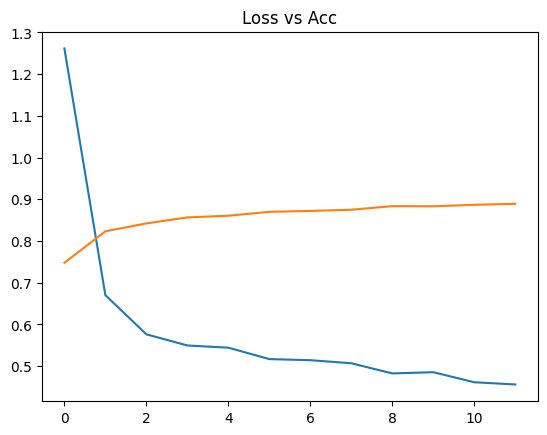

In [40]:
h = final.history
h.keys()



plt.plot(h['loss'])
plt.plot(h['accuracy'])

plt.title("Loss vs Acc")
plt.show()